# Actividad 2.1
## Diego Matias Rossano | A01737509

In [1]:
# Instalamos librería para análisis de variables categóricas
%pip install funpymodeling


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [3]:
%pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Carga desde un archivo .csv sin índice
df = pd.read_csv("Sicily.csv")
df.head(5)

,Unnamed: 0,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_communication.1,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,reviews_per_month
0,0,SEASIDE - Historic Antique Residence,WINEYARD WITH COLOURS OF THE SEASIDE.<br /><br...,NaN,Yumi Adriano,13/05/09,"Sicily, Italy","Hi, this is Yumi, I am a Japanese, I speak Ja...",NaN,NaN,...,4.69,4.66,4.86,4.83,4.72,4.72,4.59,10,10,0.18
1,1,BnB center near station with balcony and break...,Near the Central Station and the beginning of ...,"The neighborhood is in a residential area, cen...",Giuseppe,05/03/10,"Agrigento, Italy","Di carattere tranquillo e dinamico, sposato, c...",within an hour,100%,...,4.80,4.87,4.89,4.85,4.81,4.81,4.85,3,0,2.48
2,2,Etna-sea a panoramic villa,"Our country house, swathed in the greenery of ...","Contact with nature, relaxation, remarkable pa...",Serena,24/06/10,"Piedimonte Etneo, Italy",.,within a few hours,100%,...,4.79,4.82,4.83,4.89,4.81,4.81,4.76,5,5,0.90
3,3,Two steps from the sea,Very nice flat in front of the beach with a wo...,NaN,Gaspare,05/08/10,"Trapani, Italy",Managing parents' houses in Trapani and in San...,within an hour,100%,...,4.68,4.78,4.57,4.97,4.94,4.94,4.64,2,2,0.49
4,4,Villa Verdemare,Wonderful villa that can easily accommodate up...,NaN,Gaspare,05/08/10,"Trapani, Italy",Managing parents' houses in Trapani and in San...,within an hour,100%,...,4.85,4.82,4.69,4.99,4.92,4.92,4.72,2,2,0.46


In [6]:
# Limpiar columnas eliminando % y convirtiendo a numérico
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype(float)

In [7]:
# Limpiar precio (quitar $ y comas)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/lk/1s80q3g16rl6xn6yqybdsx3m0000gn/T/ipykernel_49646/3666937479.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [11]:
# Filtrar columnas relevantes
columnas = [
    'host_response_rate', 'host_acceptance_rate', 'price',
    'review_scores_cleanliness', 'review_scores_communication',
    'availability_365', 'number_of_reviews', 'reviews_per_month',
    'room_type']

In [12]:
df_limpio = df[columnas].dropna()

In [13]:
# Eliminar outliers usando método IQR
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower) & (dataframe[column] <= upper)]

In [14]:
for col in df_limpio.columns:
    if df_limpio[col].dtype in ['float64', 'int64'] and col != 'room_type':
        df_limpio = remove_outliers_iqr(df_limpio, col)

In [15]:
print(df_limpio.describe())

       host_response_rate  host_acceptance_rate         price  \
count             12147.0          12147.000000  12147.000000   
mean                100.0             99.368733     92.217091   
std                   0.0              1.517597     46.316639   
min                 100.0             93.000000     10.000000   
25%                 100.0            100.000000     60.000000   
50%                 100.0            100.000000     80.000000   
75%                 100.0            100.000000    114.000000   
max                 100.0            100.000000    247.000000   

       review_scores_cleanliness  review_scores_communication  \
count               12147.000000                 12147.000000   
mean                    4.882393                     4.941949   
std                     0.145810                     0.077407   
min                     4.380000                     4.700000   
25%                     4.810000                     4.900000   
50%                     

In [18]:
room_types = df_limpio['room_type'].value_counts().nlargest(4).index
df_clean = df_limpio[df_limpio['room_type'].isin(room_types)]

In [19]:
# Correlación
correlacion = [
    ("host_acceptance_rate", "host_response_rate"),
    ("review_scores_rating", "review_scores_cleanliness"),
    ("host_acceptance_rate", "price"),
    ("availability_365", "number_of_reviews"),
    ("host_acceptance_rate", "number_of_reviews"),
    ("reviews_per_month", "review_scores_communication")
]

In [20]:
# Gráficos por tipo de habitación
for room in room_types:
    print(f"\n=== Tipo de habitación: {room} ===")
    subset = df_limpio[df_limpio['room_type'] == room]


=== Tipo de habitación: Entire home/apt ===

=== Tipo de habitación: Private room ===

=== Tipo de habitación: Hotel room ===

=== Tipo de habitación: Shared room ===


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
heatmap = [
    'host_response_rate', 'host_acceptance_rate', 'price',
    'review_scores_cleanliness', 'review_scores_communication',
    'availability_365', 'number_of_reviews', 'reviews_per_month'
]

In [24]:
for room in room_types:
    print(f"\n Heatmap para {room}")
    room_df = df_clean[df_clean['room_type'] == room][heatmap]
    corr_matrix = room_df.corr()


 Heatmap para Entire home/apt

 Heatmap para Private room

 Heatmap para Hotel room

 Heatmap para Shared room


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


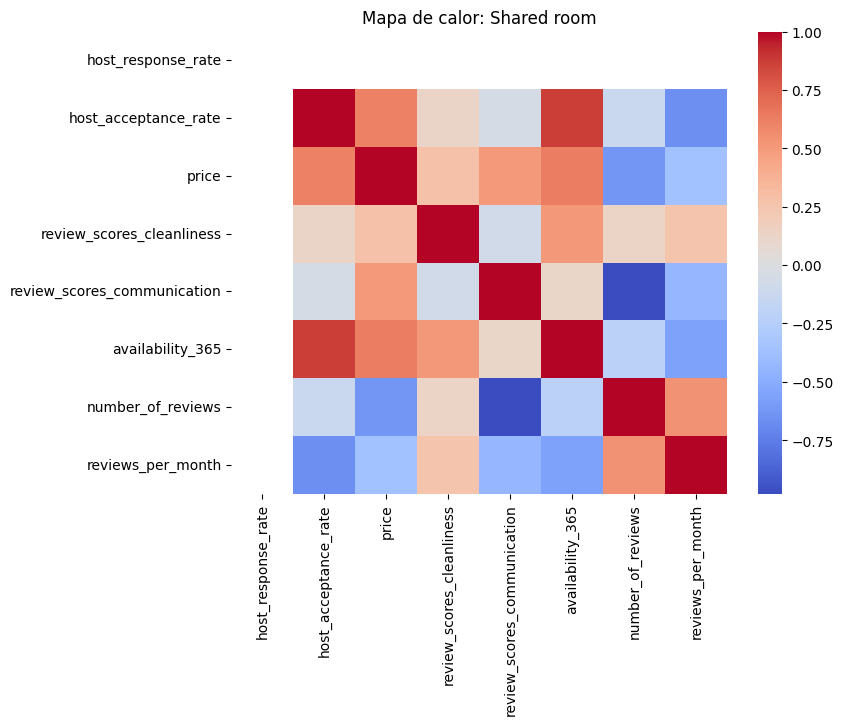

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f"Mapa de calor: {room}")
plt.show()

In [28]:
# Encontrar mayor correlación (absoluta) fuera de la diagonal
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
top_corr = [(i, j) for i, j in corr_pairs.index if i != j][0]

In [29]:
# Regresión Lineal
X = room_df[[top_corr[0]]]
y = room_df[top_corr[1]]

In [30]:
model = LinearRegression().fit(X, y)
r2 = model.score(X, y)

In [31]:
print(f"Mejor correlación: {top_corr[0]} vs {top_corr[1]}")
print(f"Coeficiente de regresión: {model.coef_[0]:.3f}, Intercepto: {model.intercept_:.3f}")
print(f"R²: {r2:.3f}")

Mejor correlación: number_of_reviews vs review_scores_communication
Coeficiente de regresión: -0.004, Intercepto: 5.023
R²: 0.957


In [33]:
for room in room_types:
    print(f"\nTop 10 correlaciones para: {room}")
    room_df = df_clean[df_clean['room_type'] == room][heatmap]
    corr_matrix = room_df.corr().abs()
    corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack()
    top_10 = corr_pairs.sort_values(ascending=False).head(10)
    print(top_10)


Top 10 correlaciones para: Entire home/apt
number_of_reviews            reviews_per_month              0.475523
review_scores_cleanliness    review_scores_communication    0.441620
review_scores_communication  number_of_reviews              0.232360
review_scores_cleanliness    number_of_reviews              0.176732
price                        reviews_per_month              0.097708
review_scores_communication  reviews_per_month              0.084369
availability_365             number_of_reviews              0.078324
price                        number_of_reviews              0.073819
                             review_scores_communication    0.073189
                             review_scores_cleanliness      0.070919
dtype: float64

Top 10 correlaciones para: Private room
number_of_reviews            reviews_per_month              0.575363
review_scores_cleanliness    review_scores_communication    0.448512
review_scores_communication  number_of_reviews              0.312934
rev

In [34]:
cuantitativas = [
    'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count',
    'accommodates', 'bedrooms', 'price', 'review_scores_value', 'reviews_per_month'
]

In [36]:
for target in cuantitativas:
    X = df_clean[[col for col in cuantitativas if col != target]]
    y = df_clean[target]

KeyError: "['host_is_superhost', 'host_total_listings_count', 'accommodates', 'bedrooms', 'review_scores_value'] not in index"